In [2]:
import cv2
import pandas as pd
import glob

In [3]:
path = "faces-datamad0620"

faceFiles = [
    *glob.glob(f"{path}/todas_homogeneas/**/*.jpg"),
    *glob.glob(f"{path}/todas_homogeneas/**/*.JPG")
]
faceFiles

['faces-datamad0620/todas_homogeneas/carlos/8.jpg',
 'faces-datamad0620/todas_homogeneas/carlos/9.jpg',
 'faces-datamad0620/todas_homogeneas/carlos/10.jpg',
 'faces-datamad0620/todas_homogeneas/carlos/4.jpg',
 'faces-datamad0620/todas_homogeneas/carlos/5.jpg',
 'faces-datamad0620/todas_homogeneas/carlos/7.jpg',
 'faces-datamad0620/todas_homogeneas/carlos/6.jpg',
 'faces-datamad0620/todas_homogeneas/carlos/2.jpg',
 'faces-datamad0620/todas_homogeneas/carlos/3.jpg',
 'faces-datamad0620/todas_homogeneas/carlos/1.jpg',
 'faces-datamad0620/todas_homogeneas/jaime/7 .jpg',
 'faces-datamad0620/todas_homogeneas/jaime/6 .jpg',
 'faces-datamad0620/todas_homogeneas/jaime/1 .jpg',
 'faces-datamad0620/todas_homogeneas/jaime/10 .jpg',
 'faces-datamad0620/todas_homogeneas/jaime/3 .jpg',
 'faces-datamad0620/todas_homogeneas/jaime/2 .jpg',
 'faces-datamad0620/todas_homogeneas/jaime/5 .jpg',
 'faces-datamad0620/todas_homogeneas/jaime/9 .jpg',
 'faces-datamad0620/todas_homogeneas/jaime/8 .jpg',
 'faces-da

In [4]:
pics = dict()
for foto in faceFiles:
    label = foto.split("/")[-2]
    pic = foto
    if label in pics:
        pics[label].append(pic)
    else:
        pics[label] = [pic]

In [5]:
im = []
for k,v in pics.items():
    for a in v:
        im.append([k,a])
faces_df =  pd.DataFrame(im, columns=["label","foto"])
display(faces_df)


,label,foto
0,carlos,faces-datamad0620/todas_homogeneas/carlos/8.jpg
1,carlos,faces-datamad0620/todas_homogeneas/carlos/9.jpg
2,carlos,faces-datamad0620/todas_homogeneas/carlos/10.jpg
3,carlos,faces-datamad0620/todas_homogeneas/carlos/4.jpg
4,carlos,faces-datamad0620/todas_homogeneas/carlos/5.jpg
...,...,...
75,antonio,faces-datamad0620/todas_homogeneas/antonio/7.jpg
76,antonio,faces-datamad0620/todas_homogeneas/antonio/6.jpg
77,antonio,faces-datamad0620/todas_homogeneas/antonio/2.jpg
78,antonio,faces-datamad0620/todas_homogeneas/antonio/3.jpg


In [6]:
faces_df.label.value_counts()

adri       10
paula      10
germán    10
míriam    10
antonio    10
jaime      10
jose       10
carlos     10
Name: label, dtype: int64

In [7]:
import random
who = random.choice(faces_df.label)
missing = pics[who]

In [8]:
missing

['faces-datamad0620/todas_homogeneas/jose/8.jpg',
 'faces-datamad0620/todas_homogeneas/jose/9.jpg',
 'faces-datamad0620/todas_homogeneas/jose/10.jpg',
 'faces-datamad0620/todas_homogeneas/jose/4.jpg',
 'faces-datamad0620/todas_homogeneas/jose/5.jpg',
 'faces-datamad0620/todas_homogeneas/jose/7.jpg',
 'faces-datamad0620/todas_homogeneas/jose/6.jpg',
 'faces-datamad0620/todas_homogeneas/jose/2.jpg',
 'faces-datamad0620/todas_homogeneas/jose/3.jpg',
 'faces-datamad0620/todas_homogeneas/jose/1.jpg']

[(290, 468, 267, 268)]


array([[ 82,  63,  47, ...,  44,  45,  48],
       [ 79,  60,  47, ...,  45,  46,  49],
       [ 71,  54,  46, ...,  42,  42,  46],
       ...,
       [212, 212, 212, ..., 175, 176, 176],
       [212, 212, 212, ..., 175, 176, 176],
       [212, 212, 212, ..., 175, 176, 176]], dtype=uint8)

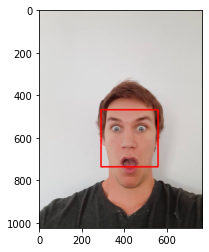

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import face_recognition

face_cascade = cv2.CascadeClassifier('./haarcascade_frontalface_default.xml')

def extractFace(picFile, method="recognition", debug=False):
    im = cv2.imread(picFile)    
    im_bw = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
    plt.imshow(im_bw, cmap="gray")
    # Face detection, OJO: esto detecta multiples caras
    if method == "recognition":
        faces = face_recognition.face_locations(im_bw)
        faces = [(l,t,r-l,b-t) for t,r,b,l in faces]
    else:
        faces = face_cascade.detectMultiScale(im_bw, 2, 4)

    if len(faces) == 0:
        print(f"Warning: no face detected on {picFile}")
        return 
    
    if debug:
        print(faces)
    selected_face = faces[0]
    discard_faces = faces[1:]
    
    if debug:
        debug_squares = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
        # plot the invalid squares in blue
        for face in discard_faces:
            x,y,w,h = face
            debug_squares = cv2.rectangle(debug_squares, (x,y), (x+w,y+h),(0, 0, 255) ,5)
        # plot the selected face in red
        x,y,w,h = selected_face
        debug_squares = cv2.rectangle(debug_squares, (x,y), (x+w,y+h),(255, 0, 0) ,5)

        plt.imshow(debug_squares)

            
    # extract selected face as B&W 
    x,y,w,h = selected_face
    cara = im_bw[y:y+h,x:x+h]    
    return cara

    
    
    
extractFace(missing[1], debug=True)

[(241, 455, 321, 321)]
[(290, 468, 267, 268)]
[(205, 491, 321, 321)]
[(260, 468, 267, 268)]
[(205, 455, 321, 321)]
[(260, 498, 267, 268)]
[(260, 498, 267, 268)]
[(200, 439, 268, 267)]
[(200, 468, 268, 268)]
[(170, 420, 321, 321)]


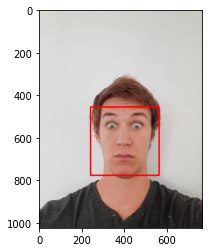

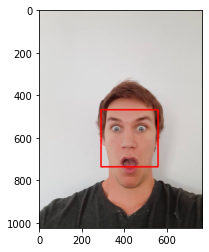

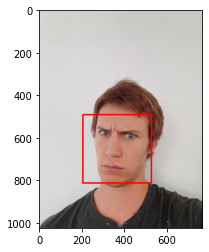

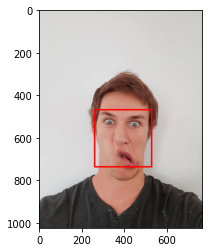

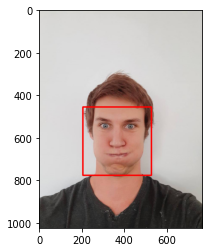

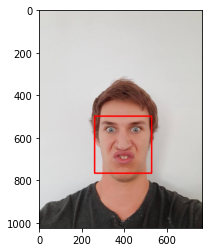

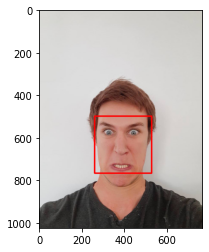

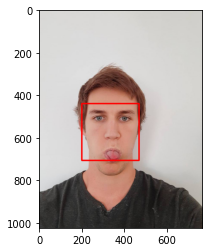

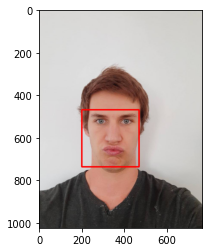

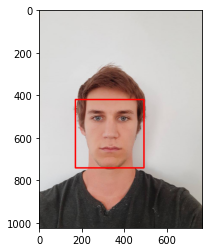

In [47]:
for missingPic in missing:
    plt.figure()
    extractFace(missingPic, debug=True)

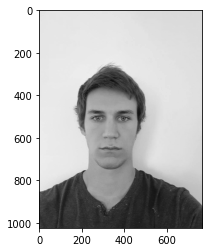

In [48]:
# Extract all faces
missingFaces = [extractFace(missingPic) for missingPic in missing]

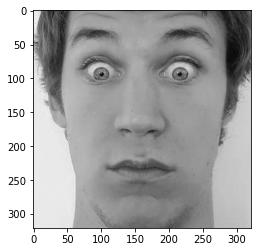

In [49]:
plt.imshow(missingFaces[0], cmap="gray")

In [50]:
import numpy as np

# Filter out invalid faces
missingFaces = [a for a in missingFaces if isinstance(a, np.ndarray)]

In [51]:
# Normalize the size of all faces
dim = (100,100)
missingNormalized = [cv2.resize(a, dim, interpolation=cv2.INTER_AREA) for a in missingFaces]

In [52]:
[a.shape for a in missingNormalized]

[(100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100)]

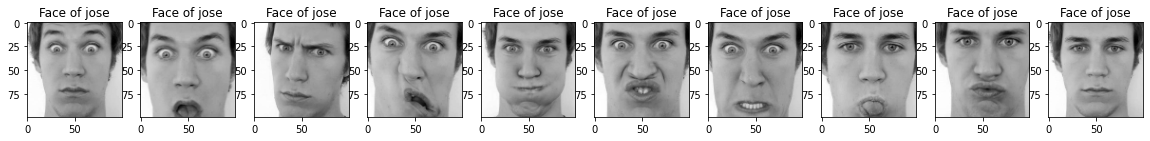

In [53]:
def printMyFace(facesImages, label):
    plt.figure(figsize=(20,5))
    for i,a in enumerate(facesImages):
        plt.subplot(1,len(facesImages), i + 1)
        plt.imshow(a, cmap="gray")
        plt.title(f"Face of {label}")
    plt.show()

printMyFace(missingNormalized, label=who)

In [54]:
# Wrap all in one fn

def processFiles(files, dim=(100,100)):
    output_faces = []
    for incomingFile in files: 
        face = extractFace(incomingFile)
        if  isinstance(face, np.ndarray):
            face = cv2.resize(face, dim, interpolation=cv2.INTER_AREA)
            output_faces.append(face)
    return output_faces
            


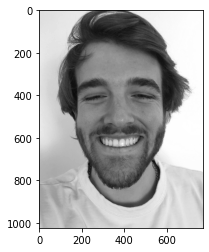

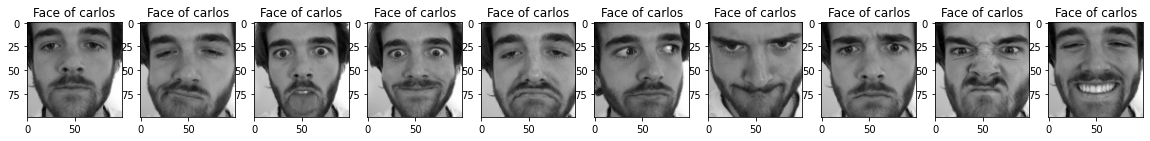

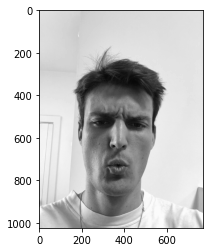

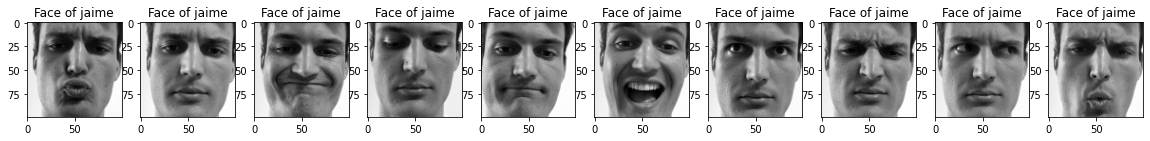

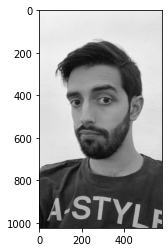

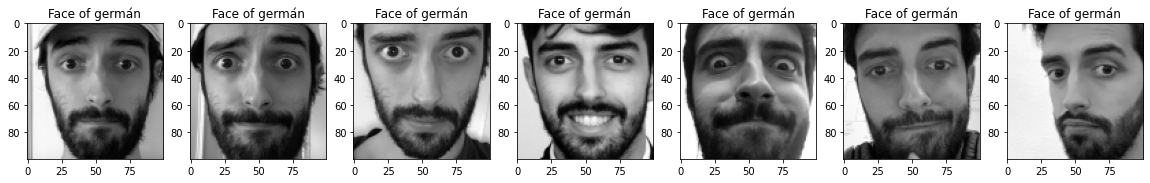

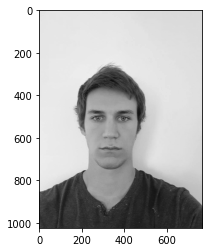

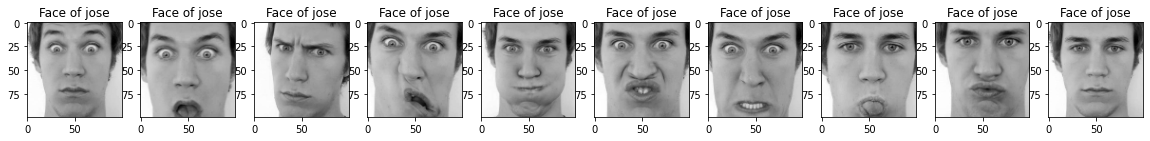

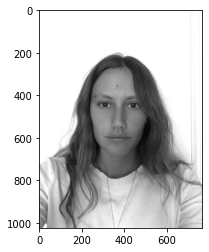

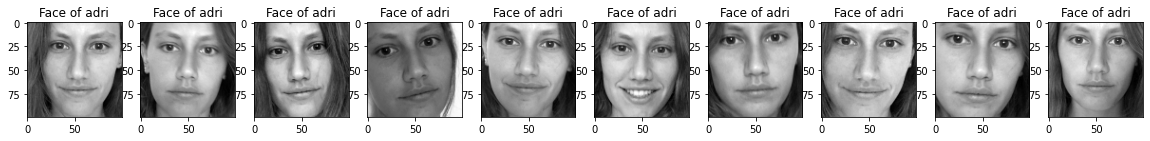

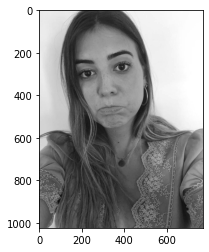

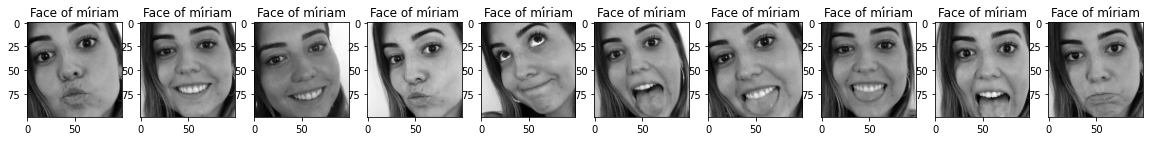

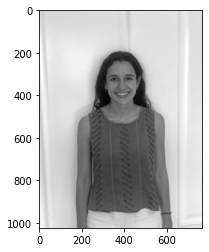

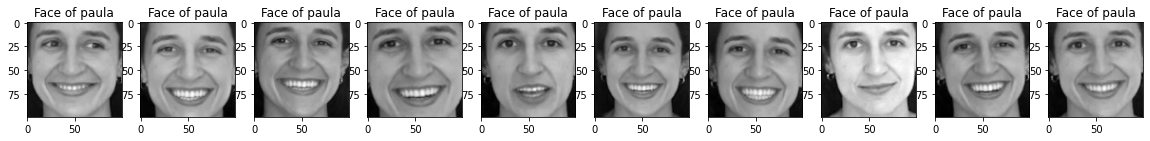

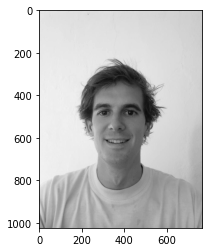

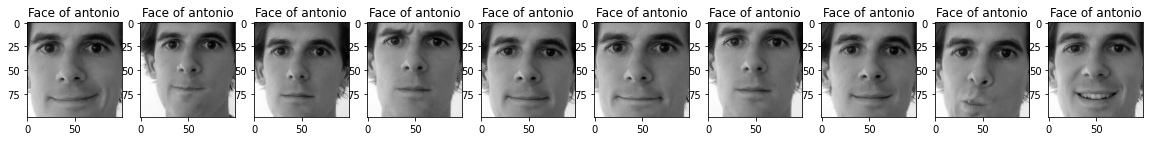

In [55]:
for label,fotos in pics.items():
    faces = processFiles(fotos)
    printMyFace(faces,label=label)


array([-0.07478857,  0.06575231,  0.05462213,  0.03387525, -0.11236607,
       -0.05021475,  0.01208812, -0.17291485,  0.10068329, -0.03976307,
        0.25390077, -0.0484702 , -0.24579772, -0.03600214,  0.04288059,
        0.09595989, -0.07326101, -0.04834927, -0.11508967, -0.03039891,
        0.01974985,  0.06001884,  0.09786187,  0.04785348, -0.17711166,
       -0.28086308, -0.10111619, -0.05071169,  0.05964233, -0.10357314,
       -0.03534498,  0.06361933, -0.17328006, -0.07219461,  0.06514122,
        0.07224431, -0.13955772, -0.04291982,  0.29009938,  0.02409161,
       -0.19796869,  0.10488328,  0.05928633,  0.23135273,  0.22266126,
        0.00654698,  0.04830275, -0.09515353,  0.0922856 , -0.28737122,
        0.13141167,  0.11246126,  0.20407847,  0.02628424,  0.06464862,
       -0.14578685, -0.16391835,  0.17837891, -0.16995856,  0.13810761,
        0.09511115, -0.03852398, -0.0693192 , -0.09392113,  0.1776747 ,
        0.16592585, -0.21641168, -0.06766109,  0.13418749, -0.18

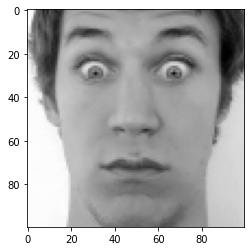

In [56]:
import face_recognition

def extractFeatures(faceIm, useFeats="face",debug=False):
    if debug:
        plt.figure()
        plt.imshow(faceIm, cmap="gray")
    if useFeats == "fft":
        fft2d = np.log(np.abs(np.fft.fft2(faceIm)))
        fft2d = fft2d[0:len(fft2d)//2,0:len(fft2d)//2]
        fft2d = fft2d[5:20,5:20]
        
        if debug:
            plt.figure()
            plt.imshow(fft2d, cmap="gray")
            print(fft2d.shape)
        
        return np.hstack(fft2d)
    elif useFeats == "face":
        imcol = cv2.cvtColor(faceIm, cv2.COLOR_GRAY2RGB)
        feats = face_recognition.face_encodings(imcol)
        if len(feats) > 0:
            return feats[0]
        return None
    
extractFeatures(missingNormalized[0], debug=True)

Processing carlos....
Processing jaime....
Processing germán....
Processing jose....
Processing adri....
Processing míriam....
Processing paula....
Processing antonio....


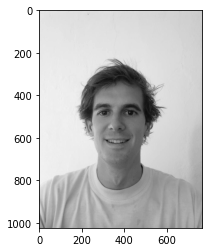

In [58]:
featurized_dataset = []
for label,fotos in pics.items():
    faces = processFiles(fotos)
    print(f"Processing {label}....")
    for i,face in enumerate(faces):
        featurized_dataset.append({
            "label":label,
            "picName":i,
            "feats":extractFeatures(face)
        })


In [59]:
df = pd.DataFrame(featurized_dataset)
df.head()

,label,picName,feats
0,carlos,0,"[-0.08236518502235413, 0.14253847301006317, 0...."
1,carlos,1,"[-0.1205449029803276, 0.14728327095508575, 0.0..."
2,carlos,2,"[-0.11599373072385788, 0.15603896975517273, 0...."
3,carlos,3,"[-0.12694677710533142, 0.1899675726890564, 0.0..."
4,carlos,4,"[-0.12464183568954468, 0.12531495094299316, 0...."


In [60]:
df.label.value_counts()

adri       10
paula      10
míriam    10
antonio    10
jaime      10
jose       10
carlos     10
germán     7
Name: label, dtype: int64

In [61]:
df = df[~df.feats.isna()]

In [62]:
df.feats.isna().value_counts()

False    74
Name: feats, dtype: int64

In [63]:
y = df.label
X = np.vstack(df.feats)

In [64]:
print(X.shape,y.shape)

(74, 128) (74,)


In [65]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y_numeric = le.fit_transform(y)
y_numeric

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3,
       3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_numeric, test_size=0.2)

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
#model = RandomForestClassifier()
model = KNeighborsClassifier()

model.fit(X_train, y_train)

KNeighborsClassifier()

In [73]:
model.predict(X_test)

array([3, 0, 1, 0, 7, 5, 2, 7, 5, 7, 0, 7, 7, 4, 2])

In [74]:
y_pred = model.predict(X_test)
pd.DataFrame({
    "pred": le.inverse_transform(y_pred),
    "real": le.inverse_transform(y_test)
})

,pred,real
0,germán,germán
1,adri,adri
2,antonio,antonio
3,adri,adri
4,paula,paula
5,jose,jose
6,carlos,carlos
7,paula,paula
8,jose,jose
9,paula,paula


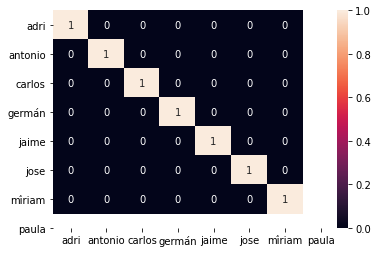

In [75]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(le.inverse_transform(y_test), le.inverse_transform(y_pred), normalize="true")
sns.heatmap(cm, annot=True,xticklabels=le.classes_, yticklabels=le.classes_)

In [71]:
le.classes_

array(['adri', 'antonio', 'carlos', 'germán', 'jaime', 'jose', 'míriam',
       'paula'], dtype=object)